In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [5]:
data = pd.read_csv('crop_recommendation.csv')

In [6]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
data.size

17600

In [8]:
data.shape

(2200, 8)

In [9]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

C:\Users\User\AppData\Local\Temp\ipykernel_18424\1798619060.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='rainbow')


<AxesSubplot: >

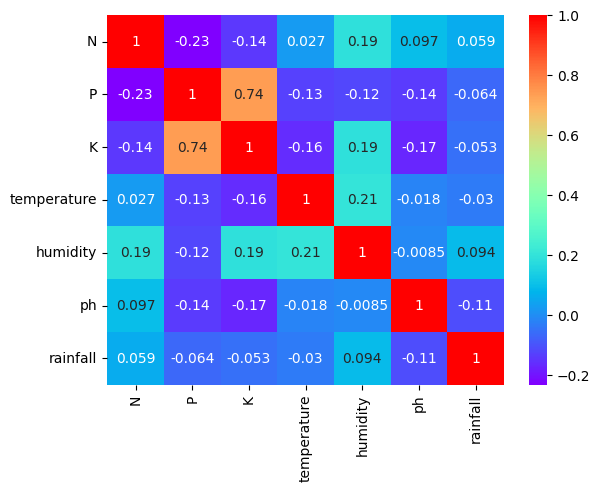

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

In [61]:
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Algorithms that can be used for multi-class classification

- k-Nearest Neighbors
- Decision Trees
- Naive Bayes
- Random Forest
- Gradient Boosting
- ANN

# KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5 , weights = 'distance' , p = 2)

# param_grid = {
#     'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
#     'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
#     'p': [1, 2]  # Parameter for the Minkowski distance metric
# }

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# cm_knn = confusion_matrix(y_test, y_pred_knn)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix - k-Nearest Neighbors')
# plt.show()

print("k-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

k-Nearest Neighbors Metrics:
Accuracy: 0.9772727272727273
Precision: 0.9796335816085233
Recall: 0.977676761500291
F1 Score: 0.9774531536734802


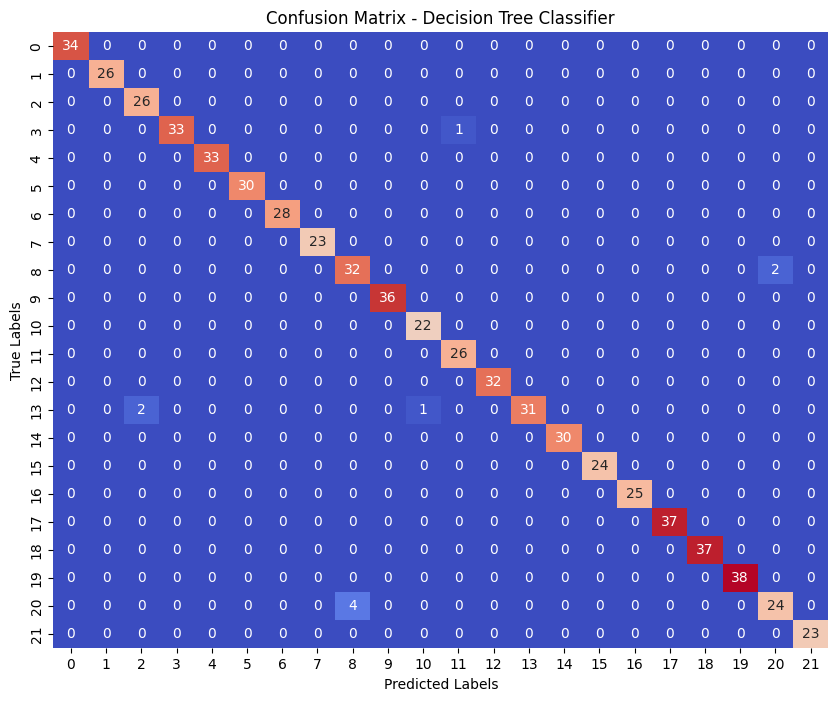

Decision tree classifier Metrics:
Accuracy: 0.9848484848484849
Precision: 0.9845464519377564
Recall: 0.985485103132162
F1 Score: 0.9847258272772212


In [30]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree, average='macro')
recall_dtree = recall_score(y_test, y_pred_dtree, average='macro')
f1_dtree = f1_score(y_test, y_pred_dtree, average='macro')

cm_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

print("Decision tree classifier Metrics:")
print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1 Score:", f1_dtree)

In [50]:
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

# cm_nb = confusion_matrix(y_test, y_pred_nb)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_nb, annot=True, fmt='d', cmap='coolwarm', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix - Naive Bayes')
# plt.show()

print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

Naive Bayes Metrics:
Accuracy: 0.9939393939393939
Precision: 0.9952153110047847
Recall: 0.9935064935064936
F1 Score: 0.993978243978244


In [62]:
rf = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=5,min_samples_leaf=4,max_features='sqrt')

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 5, 10],  # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt']  # Number of features to consider at each split
# }

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# cm_rf = confusion_matrix(y_test, y_pred_rf)
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm_rf, annot=True, fmt='d', cmap='coolwarm', cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix - Random Forest Classifier')
# plt.show()

print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Classifier Metrics:
Accuracy: 0.9920454545454546
Precision: 0.9926948051948052
Recall: 0.9906784547376511
F1 Score: 0.9912874011234667


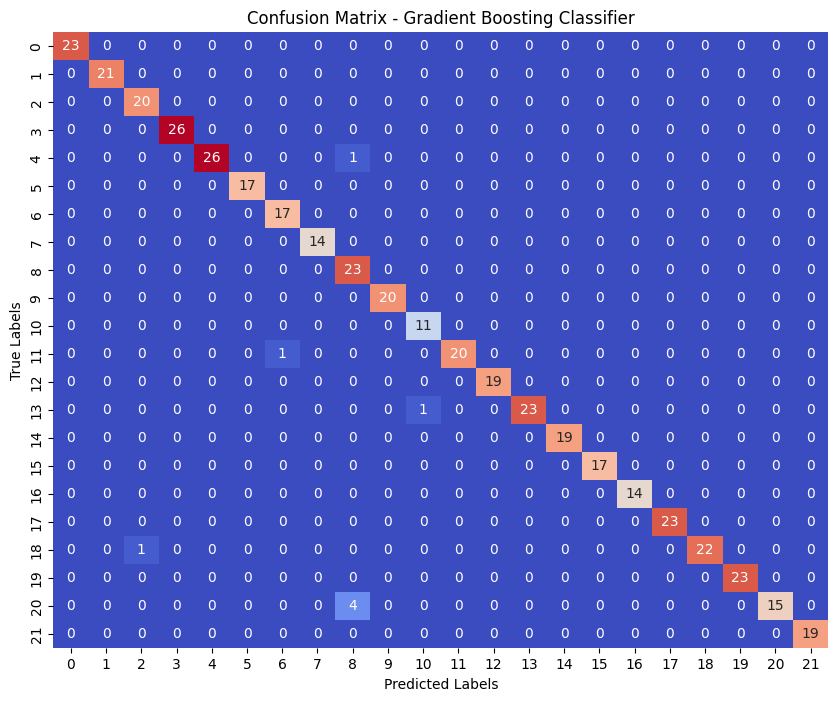

Gradient Boosting Classifier Metrics:
Accuracy: 0.9818181818181818
Precision: 0.9834054834054833
Recall: 0.9827123941826458
F1 Score: 0.981868945715869


In [17]:
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the target labels to categorical format
num_classes = len(label_encoder.classes_)
y_train_categorical = to_categorical(y_train_encoded, num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes)

# print(X_train.shape[1])

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

score, acc = model.evaluate(X_test, y_test.to_numpy().reshape(22),
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

y_pred_ann = np.argmax(model.predict(X_test), axis=-1)

accuracy_ann = accuracy_score(y_test_encoded, y_pred_ann)
precision_ann = precision_score(y_test_encoded, y_pred_ann, average='macro')
recall_ann = recall_score(y_test_encoded, y_pred_ann, average='macro')
f1_ann = f1_score(y_test_encoded, y_pred_ann, average='macro')

cm_ann = confusion_matrix(y_test_encoded, y_pred_ann)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ANN')
plt.show()

print("ANN Metrics:")
print("Accuracy:", accuracy_ann)
print("Precision:", precision_ann)
print("Recall:", recall_ann)
print("F1 Score:", f1_ann)


ValueError: cannot reshape array of size 440 into shape (22,)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

X = dataset.drop('label', axis=1)
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

param_grid = {'batch_size': [16, 32, 64], 'epochs': [10, 20, 30]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)
